In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import numpy as np
import pandas as pd
import random
import time
import cv2
import os

In [2]:
def generate_blank():
    return np.ones(shape=(96,96,3), dtype=np.int16)

In [98]:
# constants
blank = generate_blank()

angle = 0
startAngle = 0
endAngle = 360

red = (0, 0, 255)
green = (0, 255, 0)
blue = (255, 0, 0)

ELLIPSE_PATH = r"D:/Lucru/github-folder/itec-2022/dataset/dataset-shape/ellipse/"
RECTANGLE_PATH = r"D:/Lucru/github-folder/itec-2022/dataset/dataset-shape/rectangle/"
TRIANGLE_PATH = r"D:/Lucru/github-folder/itec-2022/dataset/dataset-shape/triangle/"

RED_PATH = r'D:/Lucru/github-folder/itec-2022/dataset/dataset-color/red/'
GREEN_PATH = r'D:/Lucru/github-folder/itec-2022/dataset/dataset-color/green/'
BLUE_PATH = r'D:/Lucru/github-folder/itec-2022/dataset/dataset-color/blue/'

In [4]:
def draw_random_rectangle(image, color):
    image_ = image.copy()
    x_1 = x_2 = y_1 = y_2 = 0
    while x_1 - x_2 < 25 or y_1 - y_2 < 25:
        x_1 = random.randint(10, 86)
        y_1 = random.randint(10, 86)
        x_2 = random.randint(10, 86)
        y_2 = random.randint(10, 86)
    width = np.max(np.array([x_1, x_2])) - np.min(np.array([x_1, x_2]))
    height = np.max(np.array([y_1, y_2])) - np.min(np.array([y_1, y_2]))
    area = width * height
    return cv2.rectangle(image_, pt1=(x_1,y_1), pt2=(x_2,y_2), color=color, thickness= -1), ((100 * area) / 9216) / 100

In [5]:
def generate_random_triangle_point():
    first_interval = np.array([0.1, 0.4])
    second_interval = np.array([0.56, 0.86])

    total_length = np.ptp(first_interval)+np.ptp(second_interval)
    n = 1
    numbers = np.random.random(n)*total_length
    numbers += first_interval.min()
    numbers[numbers > first_interval.max()] += second_interval.min()-first_interval.max()
    numbers = np.floor(numbers * 100).astype(int)
    return numbers[0]

In [6]:
def draw_random_triangle(image, color):
    image_ = image.copy()
    area = 0
    while area < 800 :
        x_1 = x_2 = x_3 = y_1 = y_2 = y_3 = 10
        blank = generate_blank()
        while x_1 - x_2 < 15:
            x_1 = generate_random_triangle_point()
            x_2 = generate_random_triangle_point()
            while x_1 - x_3 < 15:
                x_1 = generate_random_triangle_point()
                x_3 = generate_random_triangle_point()
                while x_2 - x_3 < 15:
                    x_2 = generate_random_triangle_point()
                    x_3 = generate_random_triangle_point()
                    while y_1 - y_2 < 15:
                        y_1 = generate_random_triangle_point()
                        y_2 = generate_random_triangle_point()
                        while y_1 - y_3 < 15:
                            y_1 = generate_random_triangle_point()
                            y_3 = generate_random_triangle_point()
                            while y_2 - y_3 < 15:
                                y_2 = generate_random_triangle_point()
                                y_3 = generate_random_triangle_point()
        A = (x_1, y_1)
        B = (x_2, y_2)
        C = (x_3, y_3)
        point_list = np.array([A, B, C])
        area = cv2.contourArea(point_list)
    return cv2.drawContours(image_, [point_list], 0, color=color, thickness=-1), ((100 * area) / 9216) / 100

In [7]:
def draw_random_ellipse(image, color):
    image_ = image.copy()
    x_1 = y_1 = 0
    x_1 = random.randint(36, 59)
    y_1 = random.randint(36, 59)
    major_axis = random.randint(10, 36)
    minor_axis = random.randint(10, 36)
    return cv2.ellipse(image_, (x_1, y_1), (major_axis, minor_axis), angle, startAngle, endAngle, color=color, thickness=-1), ((100 * (3.142 * major_axis * minor_axis)) / 9216) / 100

Text(0.5, 1.0, 'ellipse, area : 0.083')

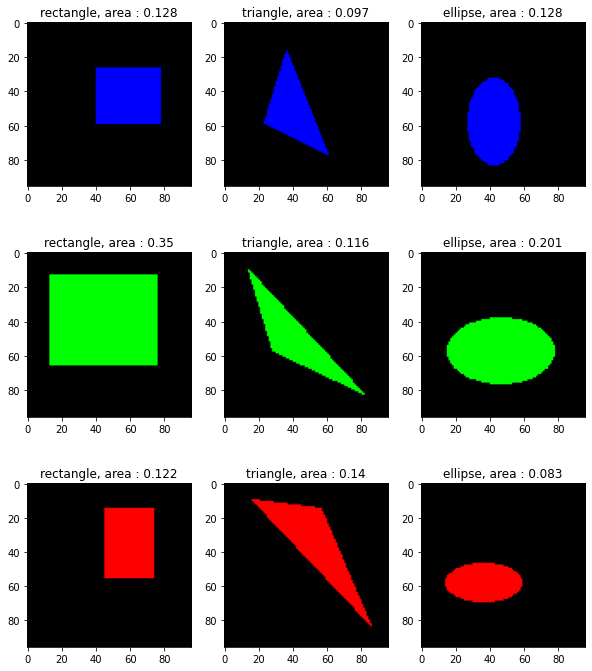

In [8]:
rectangle_sample1, rectangle_area1 = draw_random_rectangle(blank, red)
rectangle_sample2, rectangle_area2 = draw_random_rectangle(blank, green)
rectangle_sample3, rectangle_area3 = draw_random_rectangle(blank, blue)
triangle_sample1, triangle_area1 = draw_random_triangle(blank, red)
triangle_sample2, triangle_area2 = draw_random_triangle(blank, green)
triangle_sample3, triangle_area3 = draw_random_triangle(blank, blue)
ellipse_sample1, ellipse_area1 = draw_random_ellipse(blank, red)
ellipse_sample2, ellipse_area2 = draw_random_ellipse(blank, green)
ellipse_sample3, ellipse_area3 = draw_random_ellipse(blank, blue)
rows = 3
columns = 3
fig = plt.figure(figsize=(10, 12))

fig.add_subplot(rows, columns, 1)
plt.imshow(rectangle_sample1)
plt.title(f"rectangle, area : {round(rectangle_area1, 3)}")

fig.add_subplot(rows, columns, 2)
plt.imshow(triangle_sample1)
plt.title(f"triangle, area : {round(triangle_area1, 3)}")

fig.add_subplot(rows, columns, 3)
plt.imshow(ellipse_sample1)
plt.title(f"ellipse, area : {round(ellipse_area1, 3)}")

fig.add_subplot(rows, columns, 4)
plt.imshow(rectangle_sample2)
plt.title(f"rectangle, area : {round(rectangle_area2, 3)}")

fig.add_subplot(rows, columns, 5)
plt.imshow(triangle_sample2)
plt.title(f"triangle, area : {round(triangle_area2, 3)}")

fig.add_subplot(rows, columns, 6)
plt.imshow(ellipse_sample2)
plt.title(f"ellipse, area : {round(ellipse_area2, 3)}")

fig.add_subplot(rows, columns, 7)
plt.imshow(rectangle_sample3)
plt.title(f"rectangle, area : {round(rectangle_area3, 3)}")

fig.add_subplot(rows, columns, 8)
plt.imshow(triangle_sample3)
plt.title(f"triangle, area : {round(triangle_area3, 3)}")

fig.add_subplot(rows, columns, 9)
plt.imshow(ellipse_sample3)
plt.title(f"ellipse, area : {round(ellipse_area3, 3)}")

just as a small legend for me to know what the labels mean :

regarding shape :
* triangle = 0
* ellipse = 1
* rectangle = 2

regarding colors :
* rosu = 0
* verde = 1
* albastru = 2

area :
* a float smaller than 9216 (meaning 96x96)

## Dataset for the shape network

In [97]:
t1 = time.time()
data = []
sample_id = 0
for batch in tqdm(range(335)):
    for sample in range(3):
        if sample == 0:
            rectangle_sample, rectangle_area = draw_random_rectangle(blank, red)
            if random.uniform(0, 1) > 0.5:
                noise = np.random.uniform(0, 127, (96, 96, 3))
                rectangle_sample = rectangle_sample + noise
                rectangle_sample = rectangle_sample.astype(int)
            data.append([f"{sample_id}.png", 2.0, 0.0, round(rectangle_area, 3)])
            cv2.imwrite(f"{RECTANGLE_PATH}{sample_id}.png", rectangle_sample)
            sample_id = sample_id + 1
        elif sample == 1:
            rectangle_sample, rectangle_area = draw_random_rectangle(blank, green)
            if random.uniform(0, 1) > 0.5:
                noise = np.random.uniform(0, 127, (96, 96, 3))
                rectangle_sample = rectangle_sample + noise
                rectangle_sample = rectangle_sample.astype(int)
            data.append([f"{sample_id}.png", 2.0, 1.0, round(rectangle_area, 3)])
            cv2.imwrite(f"{RECTANGLE_PATH}{sample_id}.png", rectangle_sample)
            sample_id = sample_id + 1
        elif sample == 2:
            rectangle_sample, rectangle_area = draw_random_rectangle(blank, blue)
            if random.uniform(0, 1) > 0.5:
                noise = np.random.uniform(0, 127, (96, 96, 3))
                rectangle_sample = rectangle_sample + noise
                rectangle_sample = rectangle_sample.astype(int)
            data.append([f"{sample_id}.png", 2.0, 2.0, round(rectangle_area, 3)])
            cv2.imwrite(f"{RECTANGLE_PATH}{sample_id}.png", rectangle_sample)
            sample_id = sample_id + 1
sample_id = 0
for batch in tqdm(range(335)):
    for sample in range(3):
        if sample == 0:
            ellipse_sample, ellipse_area = draw_random_ellipse(blank, red)
            if random.uniform(0, 1) > 0.5:
                noise = np.random.uniform(0, 127, (96, 96, 3))
                ellipse_sample = ellipse_sample + noise
                ellipse_sample = ellipse_sample.astype(int)
            data.append([f"{sample_id}.png", 1.0, 0.0, round(ellipse_area, 3)])
            cv2.imwrite(f"{ELLIPSE_PATH}{sample_id}.png", ellipse_sample)
            sample_id = sample_id + 1
        elif sample == 1:
            ellipse_sample, ellipse_area = draw_random_ellipse(blank, green)
            if random.uniform(0, 1) > 0.5:
                noise = np.random.uniform(0, 127, (96, 96, 3))
                ellipse_sample = ellipse_sample + noise
                ellipse_sample = ellipse_sample.astype(int)
            data.append([f"{sample_id}.png", 1.0, 1.0, round(ellipse_area, 3)])
            cv2.imwrite(f"{ELLIPSE_PATH}{sample_id}.png", ellipse_sample)
            sample_id = sample_id + 1
        elif sample == 2:
            ellipse_sample, ellipse_area = draw_random_ellipse(blank, blue)
            if random.uniform(0, 1) > 0.5:
                noise = np.random.uniform(0, 127, (96, 96, 3))
                ellipse_sample = ellipse_sample + noise
                ellipse_sample = ellipse_sample.astype(int)
            data.append([f"{sample_id}.png", 1.0, 2.0, round(ellipse_area, 3)])
            cv2.imwrite(f"{ELLIPSE_PATH}{sample_id}.png", ellipse_sample)
            sample_id = sample_id + 1
sample_id = 0
for batch in tqdm(range(335)):
    for sample in range(3):
        if sample == 0:
            triangle_sample, triangle_area = draw_random_triangle(blank, red)
            if random.uniform(0, 1) > 0.5:
                noise = np.random.uniform(0, 127, (96, 96, 3))
                triangle_sample = triangle_sample + noise
                triangle_sample = triangle_sample.astype(int)
            data.append([f"{sample_id}.png", 0.0, 0.0, round(triangle_area, 3)])
            cv2.imwrite(f"{TRIANGLE_PATH}{sample_id}.png", triangle_sample)
            sample_id = sample_id + 1
        elif sample == 1:
            triangle_sample, triangle_area = draw_random_triangle(blank, green)
            if random.uniform(0, 1) > 0.5:
                noise = np.random.uniform(0, 127, (96, 96, 3))
                triangle_sample = triangle_sample + noise
                triangle_sample = triangle_sample.astype(int)
            data.append([f"{sample_id}.png", 0.0, 1.0, round(triangle_area, 3)])
            cv2.imwrite(f"{TRIANGLE_PATH}{sample_id}.png", triangle_sample)
            sample_id = sample_id + 1
        elif sample == 2:
            triangle_sample, triangle_area = draw_random_triangle(blank, blue)
            if random.uniform(0, 1) > 0.5:
                noise = np.random.uniform(0, 127, (96, 96, 3))
                triangle_sample = triangle_sample + noise
                triangle_sample = triangle_sample.astype(int)
            data.append([f"{sample_id}.png", 0.0, 2.0, round(triangle_area, 3)])
            cv2.imwrite(f"{TRIANGLE_PATH}{sample_id}.png", triangle_sample)
            sample_id = sample_id + 1
t1 = time.time() - t1
df = pd.DataFrame(data, columns = ["image_id", "shape", "color", "area"])
print(f'Generating dataset took {t1} seconds.')

100%|████████████████████████████████████████████████████████████████████████████████| 335/335 [00:12<00:00, 27.32it/s]

Generating dataset took 13.56814980506897 seconds.


In [93]:
df.head()

,image_id,shape,color,area
0,0.png,2.0,0.0,0.141
1,1.png,2.0,1.0,0.104
2,2.png,2.0,2.0,0.088
3,3.png,2.0,0.0,0.136
4,4.png,2.0,1.0,0.117


<AxesSubplot:>

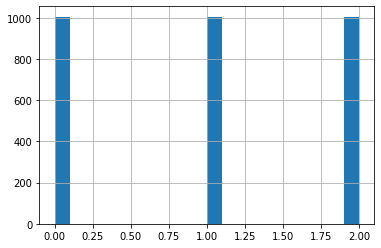

In [94]:
df["shape"].hist(bins=20)

<AxesSubplot:>

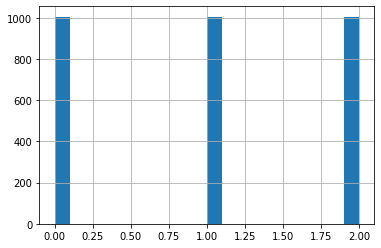

In [95]:
df["color"].hist(bins=20)

<AxesSubplot:>

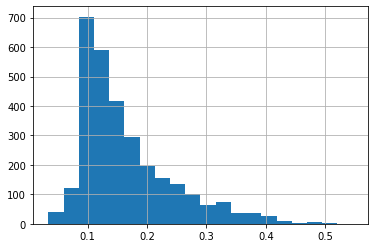

In [96]:
df["area"].hist(bins=20)

## Dataset for the color network

In [100]:
t1 = time.time()
data = []
sample_id = 0
for batch in tqdm(range(335)):
    for sample in range(3):
        if sample == 0:
            rectangle_sample, rectangle_area = draw_random_rectangle(blank, red)
            if random.uniform(0, 1) > 0.5:
                noise = np.random.uniform(0, 127, (96, 96, 3))
                rectangle_sample = rectangle_sample + noise
                rectangle_sample = rectangle_sample.astype(int)
            data.append([f"{sample_id}.png", 2.0, 0.0, round(rectangle_area, 3)])
            cv2.imwrite(f"{RED_PATH}{sample_id}.png", rectangle_sample)
            sample_id = sample_id + 1
        elif sample == 1:
            ellipse_sample, ellipse_area = draw_random_ellipse(blank, red)
            if random.uniform(0, 1) > 0.5:
                noise = np.random.uniform(0, 127, (96, 96, 3))
                ellipse_sample = ellipse_sample + noise
                ellipse_sample = ellipse_sample.astype(int)
            data.append([f"{sample_id}.png", 1.0, 0.0, round(ellipse_area, 3)])
            cv2.imwrite(f"{RED_PATH}{sample_id}.png", ellipse_sample)
            sample_id = sample_id + 1
        elif sample == 2:
            triangle_sample, triangle_area = draw_random_triangle(blank, red)
            if random.uniform(0, 1) > 0.5:
                noise = np.random.uniform(0, 127, (96, 96, 3))
                triangle_sample = triangle_sample + noise
                triangle_sample = triangle_sample.astype(int)
            data.append([f"{sample_id}.png", 0.0, 0.0, round(triangle_area, 3)])
            cv2.imwrite(f"{RED_PATH}{sample_id}.png", triangle_sample)
            sample_id = sample_id + 1
sample_id = 0
for batch in tqdm(range(335)):
    for sample in range(3):
        if sample == 0:
            rectangle_sample, rectangle_area = draw_random_rectangle(blank, green)
            if random.uniform(0, 1) > 0.5:
                noise = np.random.uniform(0, 127, (96, 96, 3))
                rectangle_sample = rectangle_sample + noise
                rectangle_sample = rectangle_sample.astype(int)
            data.append([f"{sample_id}.png", 2.0, 1.0, round(rectangle_area, 3)])
            cv2.imwrite(f"{GREEN_PATH}{sample_id}.png", rectangle_sample)
            sample_id = sample_id + 1
        elif sample == 1:
            ellipse_sample, ellipse_area = draw_random_ellipse(blank, green)
            if random.uniform(0, 1) > 0.5:
                noise = np.random.uniform(0, 127, (96, 96, 3))
                ellipse_sample = ellipse_sample + noise
                ellipse_sample = ellipse_sample.astype(int)
            data.append([f"{sample_id}.png", 1.0, 1.0, round(ellipse_area, 3)])
            cv2.imwrite(f"{GREEN_PATH}{sample_id}.png", ellipse_sample)
            sample_id = sample_id + 1
        elif sample == 2:
            triangle_sample, triangle_area = draw_random_triangle(blank, green)
            if random.uniform(0, 1) > 0.5:
                noise = np.random.uniform(0, 127, (96, 96, 3))
                triangle_sample = triangle_sample + noise
                triangle_sample = triangle_sample.astype(int)
            data.append([f"{sample_id}.png", 0.0, 1.0, round(triangle_area, 3)])
            cv2.imwrite(f"{GREEN_PATH}{sample_id}.png", triangle_sample)
            sample_id = sample_id + 1
sample_id = 0
for batch in tqdm(range(335)):
    for sample in range(3):
        if sample == 0:
            rectangle_sample, rectangle_area = draw_random_rectangle(blank, blue)
            if random.uniform(0, 1) > 0.5:
                noise = np.random.uniform(0, 127, (96, 96, 3))
                rectangle_sample = rectangle_sample + noise
                rectangle_sample = rectangle_sample.astype(int)
            data.append([f"{sample_id}.png", 2.0, 2.0, round(rectangle_area, 3)])
            cv2.imwrite(f"{BLUE_PATH}{sample_id}.png", rectangle_sample)
            sample_id = sample_id + 1
        elif sample == 1:
            ellipse_sample, ellipse_area = draw_random_ellipse(blank, blue)
            if random.uniform(0, 1) > 0.5:
                noise = np.random.uniform(0, 127, (96, 96, 3))
                ellipse_sample = ellipse_sample + noise
                ellipse_sample = ellipse_sample.astype(int)
            data.append([f"{sample_id}.png", 1.0, 2.0, round(ellipse_area, 3)])
            cv2.imwrite(f"{BLUE_PATH}{sample_id}.png", ellipse_sample)
            sample_id = sample_id + 1
        elif sample == 2:
            triangle_sample, triangle_area = draw_random_triangle(blank, blue)
            if random.uniform(0, 1) > 0.5:
                noise = np.random.uniform(0, 127, (96, 96, 3))
                triangle_sample = triangle_sample + noise
                triangle_sample = triangle_sample.astype(int)
            data.append([f"{sample_id}.png", 0.0, 2.0, round(triangle_area, 3)])
            cv2.imwrite(f"{BLUE_PATH}{sample_id}.png", triangle_sample)
            sample_id = sample_id + 1
t1 = time.time() - t1
df = pd.DataFrame(data, columns = ["image_id", "shape", "color", "area"])
print(f'Generating dataset took {t1} seconds.')

100%|████████████████████████████████████████████████████████████████████████████████| 335/335 [00:04<00:00, 74.13it/s]

Generating dataset took 12.931443214416504 seconds.
